In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

/Users/aditya/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
prices = pd.read_csv("Prices.csv", index_col="Date", parse_dates=True)

In [3]:
tickers =["AAPL", "EXC", "GE", "INTC", "PFE", "SPY", "FBNDX", "VBTIX", "SPGSCI", "XPT", "CAD", "GBP"]

In [4]:
prices = prices[tickers]
prices

,AAPL,EXC,GE,INTC,PFE,SPY,FBNDX,VBTIX,SPGSCI,XPT,CAD,GBP
Date,,,,,,,,,,,,
1999-12-31,0.917969,12.393010,309.753998,41.156250,30.775618,146.875000,6.89,9.56,194.5372,442.50,0.691515,1.6182
2000-01-03,0.999442,12.080956,300.246216,43.500000,30.241936,145.437500,6.85,9.52,194.2237,442.50,0.691181,1.6362
2000-01-04,0.915179,11.991797,288.236359,41.468750,29.115274,139.750000,6.87,9.54,192.3673,438.50,0.688326,1.6360
2000-01-05,0.928571,12.571327,287.735931,41.812500,29.589659,140.000000,6.84,9.50,190.5185,420.50,0.689655,1.6426
2000-01-06,0.848214,12.593616,291.582855,39.375000,30.657021,137.750000,6.86,9.53,190.4214,412.50,0.684978,1.6474
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,36.707500,31.262482,41.554073,43.590000,38.472485,234.339996,7.68,10.43,367.2925,785.84,0.735456,1.2706
2018-12-26,39.292500,31.726107,44.376389,46.189999,40.028461,246.179993,7.65,10.39,380.2251,797.45,0.736703,1.2633
2018-12-27,39.037498,31.940086,43.655800,46.360001,40.654648,248.070007,7.63,10.40,374.1741,796.70,0.734268,1.2644


In [5]:
annualization_factor = 260

In [6]:
def calculate_daily_returns(data):
    return np.log(data/data.shift(1)).dropna()
        

In [7]:
def calculate_sharpe_ratio(returns, risk_free_rate=0.0):
    sharpe_ratio = ((returns.mean() - risk_free_rate) / returns.std()) * np.sqrt(annualization_factor)
    return sharpe_ratio


In [8]:
bmk_returns = calculate_daily_returns(prices)
bmk_sharpe = calculate_sharpe_ratio(bmk_returns)

In [9]:
bmk_returns

,AAPL,EXC,GE,INTC,PFE,SPY,FBNDX,VBTIX,SPGSCI,XPT,CAD,GBP
Date,,,,,,,,,,,,
2000-01-03,0.085034,-0.025502,-0.031176,0.055385,-0.017493,-0.009835,-0.005822,-0.004193,-0.001613,0.000000,-0.000484,0.011062
2000-01-04,-0.088077,-0.007407,-0.040822,-0.047821,-0.037967,-0.039891,0.002915,0.002099,-0.009604,-0.009081,-0.004139,-0.000122
2000-01-05,0.014527,0.047196,-0.001738,0.008255,0.016162,0.001787,-0.004376,-0.004202,-0.009657,-0.041915,0.001929,0.004026
2000-01-06,-0.090514,0.001771,0.013281,-0.060064,0.035437,-0.016202,0.002920,0.003153,-0.000510,-0.019208,-0.006804,0.002918
2000-01-07,0.046281,0.000000,0.037991,0.040441,0.065505,0.056452,0.001457,0.002096,-0.009861,0.012048,0.002812,-0.004929
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.026215,-0.045929,-0.032697,-0.028273,-0.033466,-0.026778,0.001303,0.001919,-0.034847,-0.001678,0.000368,0.004812
2018-12-26,0.068053,0.014721,0.065712,0.057936,0.039647,0.049290,-0.003914,-0.003842,0.034605,0.014666,0.001693,-0.005762
2018-12-27,-0.006511,0.006722,-0.016371,0.003674,0.015522,0.007648,-0.002618,0.000962,-0.016042,-0.000941,-0.003310,0.000870


In [10]:
bmk_sharpe

AAPL      0.472338
EXC       0.198705
GE       -0.332952
INTC      0.018816
PFE       0.063730
SPY       0.147747
FBNDX     0.153742
VBTIX     0.126802
SPGSCI    0.151303
XPT       0.139828
CAD       0.034611
GBP      -0.136238
dtype: float64

In [11]:
def movingAverageCrossover(data, instrument, fastWindow, slowWindow, position):
    
    output_df = pd.DataFrame()
    
    if position not in ['flat', 'short']:
        raise ValueError("Position must be either 'flat' or 'short'.")
    
    output_df['FastMA'] = data[instrument].rolling(window=fastWindow).mean()
    output_df['SlowMA'] = data[instrument].rolling(window=slowWindow).mean()
    output_df = output_df.dropna(subset=['FastMA', 'SlowMA'])
    output_df['LogReturn'] = np.log(data[instrument] / data[instrument].shift(1))
        
    if position == "flat":
        output_df['PositionFlat'] = np.where(output_df['FastMA'] > output_df['SlowMA'], 1, 0)
        output_df[instrument] = output_df['LogReturn'] * output_df['PositionFlat'].shift(1)
        result = output_df[instrument]
    elif position == "short":
        output_df['PositionShort'] = np.where(output_df['FastMA'] > output_df['SlowMA'], 1, -1)
        output_df[instrument] = output_df['LogReturn'] * output_df['PositionShort'].shift(1)
        result = output_df[instrument]
    
    return result


In [12]:
ma_flat_returns = pd.DataFrame()
ma_short_returns = pd.DataFrame()

In [13]:
for instrument in prices.columns:
    ma_flat_returns[instrument] = movingAverageCrossover(prices, instrument, fastWindow=10, slowWindow=60, position = "flat")
    ma_short_returns[instrument] = movingAverageCrossover(prices, instrument, fastWindow=10, slowWindow=60, position = "short")

In [14]:
ma_flat_sharpe = calculate_sharpe_ratio(ma_flat_returns)
ma_short_sharpe = calculate_sharpe_ratio(ma_short_returns)

In [15]:
def bollingerBands(data, instrument, lookbackWindow, stdevBand):
    
    output_df = data[instrument].copy().to_frame()
    
    
    rolling_mean = data[instrument].rolling(window=lookbackWindow).mean()
    rolling_std = data[instrument].rolling(window=lookbackWindow).std()

    # Calculate the upper and lower Bollinger Bands
    upper_band = rolling_mean + (stdevBand * rolling_std)
    lower_band = rolling_mean - (stdevBand * rolling_std)

    # Buy when the price crosses below the lower Bollinger Band, and sell when the price crosses above the upper Bollinger Band
    output_df['Position'] = np.where(data[instrument] < lower_band, 1, np.nan)  # Long entry
    output_df['Position'] = np.where(data[instrument] > upper_band, -1, output_df['Position']) # Short entry
    output_df['Position'] = output_df['Position'].ffill()  # Forward fill positions

    # Calculate daily log returns
    output_df['LogReturn'] = (np.log(data[instrument]/data[instrument].shift(1)))

    # Calculate strategy returns
    output_df[instrument] = output_df['LogReturn'] * output_df['Position'].shift(1)  # Shift the positions to the next day when calculating strategy returns

    # Drop NaN values created by the rolling function
    output_df = output_df.dropna(subset=['LogReturn'])

    return output_df[instrument]

In [16]:
bb_returns = pd.DataFrame()

In [17]:
for instrument in prices.columns:
    bb_returns[instrument] = bollingerBands(prices, instrument, lookbackWindow=40, stdevBand= 2)

In [18]:
bb_returns

,AAPL,EXC,GE,INTC,PFE,SPY,FBNDX,VBTIX,SPGSCI,XPT,CAD,GBP
Date,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.026215,0.045929,-0.032697,-0.028273,0.033466,-0.026778,-0.001303,-0.001919,-0.034847,-0.001678,0.000368,0.004812
2018-12-26,0.068053,-0.014721,0.065712,0.057936,0.039647,0.049290,0.003914,0.003842,0.034605,0.014666,0.001693,-0.005762
2018-12-27,-0.006511,-0.006722,-0.016371,0.003674,0.015522,0.007648,0.002618,-0.000962,-0.016042,-0.000941,-0.003310,0.000870


In [19]:
bb_sharpe = calculate_sharpe_ratio(bb_returns)

In [20]:
bb_sharpe

AAPL     -0.481406
EXC       0.152095
GE        0.081635
INTC      0.013139
PFE       0.191785
SPY      -0.051726
FBNDX    -0.020124
VBTIX     0.243160
SPGSCI   -0.253605
XPT      -0.466694
CAD      -0.031042
GBP      -0.040682
dtype: float64

In [21]:
sharpe_ratios_df = pd.DataFrame({
    'Benchmark': bmk_sharpe,
    'MA_Flat': ma_flat_sharpe,
    'MA_Short': ma_short_sharpe,
    'Bollinger_Bands': bb_sharpe
})

In [22]:
sharpe_ratios_df

,Benchmark,MA_Flat,MA_Short,Bollinger_Bands
AAPL,0.472338,0.494471,0.332198,-0.481406
EXC,0.198705,0.295351,0.207385,0.152095
GE,-0.332952,-0.152296,0.183852,0.081635
INTC,0.018816,-0.152293,-0.118604,0.013139
PFE,0.063730,0.057549,0.021776,0.191785
SPY,0.147747,0.214307,0.100529,-0.051726
FBNDX,0.153742,0.327948,0.313729,-0.020124
VBTIX,0.126802,-0.027320,-0.166684,0.243160
SPGSCI,0.151303,0.348196,0.356603,-0.253605
XPT,0.139828,0.237168,0.213304,-0.466694


In [23]:
bmk_returns.corr()

,AAPL,EXC,GE,INTC,PFE,SPY,FBNDX,VBTIX,SPGSCI,XPT,CAD,GBP
AAPL,1.000000,0.159352,0.338322,0.470896,0.192238,0.496258,-0.132618,-0.167774,0.096118,0.075696,0.184242,0.037025
EXC,0.159352,1.000000,0.291936,0.220837,0.312119,0.454558,-0.027070,-0.072417,0.167550,0.137871,0.266832,0.134645
GE,0.338322,0.291936,1.000000,0.422825,0.407958,0.692634,-0.173092,-0.234342,0.147968,0.095910,0.291454,0.109231
INTC,0.470896,0.220837,0.422825,1.000000,0.278899,0.645388,-0.162509,-0.207907,0.107212,0.076363,0.227199,0.047250
PFE,0.192238,0.312119,0.407958,0.278899,1.000000,0.560751,-0.098324,-0.144505,0.091329,0.058517,0.213328,0.070876
SPY,0.496258,0.454558,0.692634,0.645388,0.560751,1.000000,-0.203950,-0.298902,0.245685,0.168043,0.435035,0.168779
FBNDX,-0.132618,-0.027070,-0.173092,-0.162509,-0.098324,-0.203950,1.000000,0.902006,-0.060624,0.045946,-0.025196,0.085658
VBTIX,-0.167774,-0.072417,-0.234342,-0.207907,-0.144505,-0.298902,0.902006,1.000000,-0.129130,0.015409,-0.096089,0.053797
SPGSCI,0.096118,0.167550,0.147968,0.107212,0.091329,0.245685,-0.060624,-0.129130,1.000000,0.322893,0.404123,0.237088
XPT,0.075696,0.137871,0.095910,0.076363,0.058517,0.168043,0.045946,0.015409,0.322893,1.000000,0.302979,0.243863


In [24]:
ma_flat_returns.corr()

,AAPL,EXC,GE,INTC,PFE,SPY,FBNDX,VBTIX,SPGSCI,XPT,CAD,GBP
AAPL,1.000000,0.051125,0.175478,0.273262,0.060082,0.283048,-0.088432,-0.106858,0.033158,0.054248,0.086245,0.033212
EXC,0.051125,1.000000,0.092630,0.104725,0.124141,0.207391,-0.044894,-0.049116,0.037954,0.036827,0.115031,0.025406
GE,0.175478,0.092630,1.000000,0.262224,0.194494,0.493517,-0.095699,-0.123953,0.096954,0.097681,0.181589,0.106469
INTC,0.273262,0.104725,0.262224,1.000000,0.138458,0.495436,-0.119560,-0.140598,0.055250,0.057957,0.138391,0.053724
PFE,0.060082,0.124141,0.194494,0.138458,1.000000,0.332591,-0.059332,-0.062955,0.046317,0.040043,0.091428,0.061852
SPY,0.283048,0.207391,0.493517,0.495436,0.332591,1.000000,-0.140772,-0.161097,0.168430,0.136031,0.286504,0.143281
FBNDX,-0.088432,-0.044894,-0.095699,-0.119560,-0.059332,-0.140772,1.000000,0.805960,-0.047899,0.023102,-0.015483,0.069937
VBTIX,-0.106858,-0.049116,-0.123953,-0.140598,-0.062955,-0.161097,0.805960,1.000000,-0.071170,0.010179,-0.045656,0.038596
SPGSCI,0.033158,0.037954,0.096954,0.055250,0.046317,0.168430,-0.047899,-0.071170,1.000000,0.271473,0.312257,0.178821
XPT,0.054248,0.036827,0.097681,0.057957,0.040043,0.136031,0.023102,0.010179,0.271473,1.000000,0.250439,0.160762


In [25]:
prices.columns[6:9:2]

Index(['FBNDX', 'SPGSCI'], dtype='object')

In [26]:
import seaborn as sns

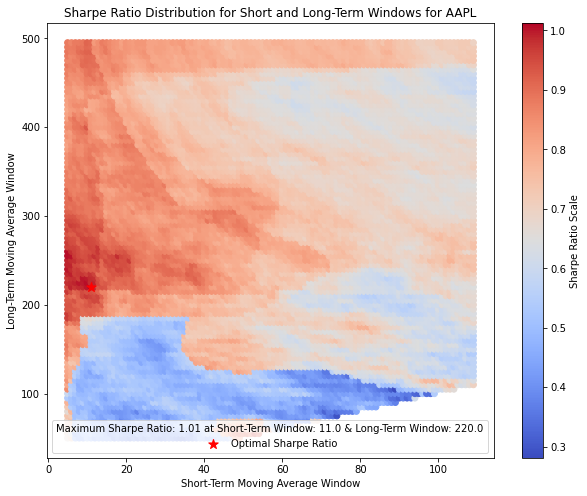

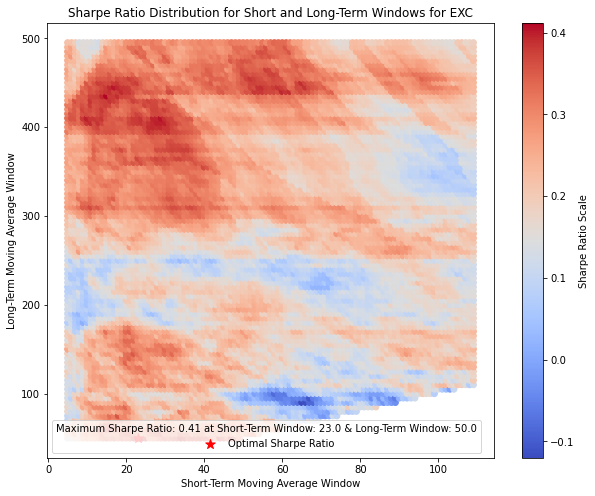

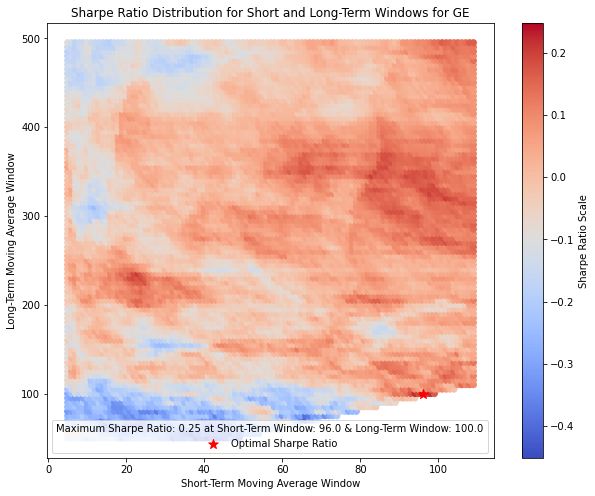

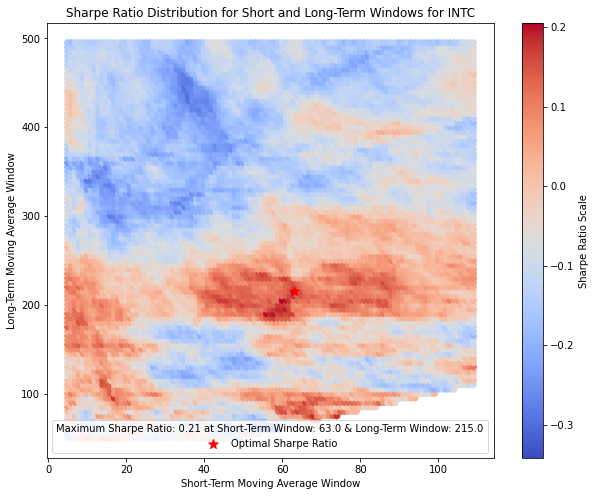

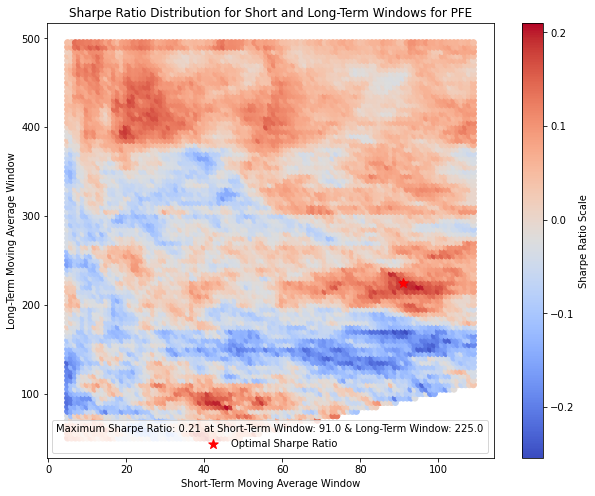

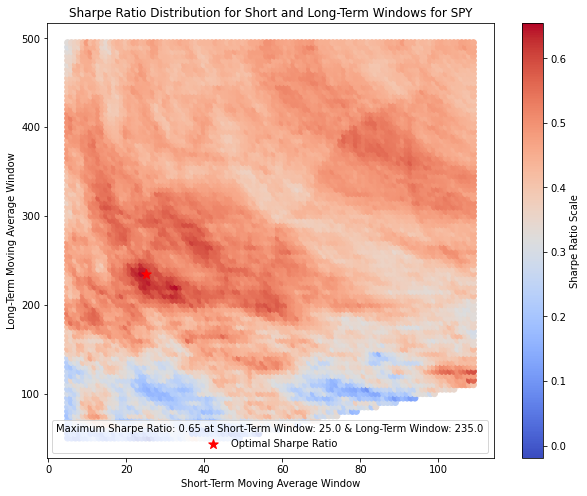

In [27]:
fast_windows = range(5, 110) 
slow_windows = range(50, 500, 5)
position = 'flat'  

for instrument in prices.columns[:6]:
    
    sharpe_data = []
    for fast in fast_windows:
        for slow in slow_windows:
            if fast < slow:
                strategy_returns = movingAverageCrossover(prices, instrument, fast, slow, position)
                sharpe_ratio = calculate_sharpe_ratio(strategy_returns)
                sharpe_data.append((fast, slow, sharpe_ratio))
                
    sharpe_df = pd.DataFrame(sharpe_data, columns=['ShortWindow', 'LongWindow', 'SharpeRatio'])
    
    max_sharpe = sharpe_df.loc[sharpe_df['SharpeRatio'].idxmax()]

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(sharpe_df['ShortWindow'], sharpe_df['LongWindow'], c=sharpe_df['SharpeRatio'], cmap='coolwarm')

    plt.scatter(max_sharpe['ShortWindow'], max_sharpe['LongWindow'], color='red', marker='*', s=100, label='Optimal Sharpe Ratio')

    color_bar = plt.colorbar(scatter)
    color_bar.set_label('Sharpe Ratio Scale')

    plt.xlabel('Short-Term Moving Average Window')
    plt.ylabel('Long-Term Moving Average Window')
    plt.title(f'Sharpe Ratio Distribution for Short and Long-Term Windows for {instrument}')

    plt.legend(title=f'Maximum Sharpe Ratio: {max_sharpe["SharpeRatio"]:.2f} at Short-Term Window: {max_sharpe["ShortWindow"]} & Long-Term Window: {max_sharpe["LongWindow"]}')


    plt.show()



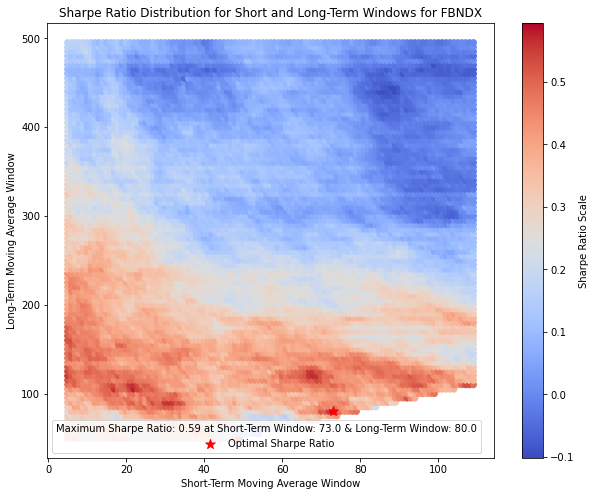

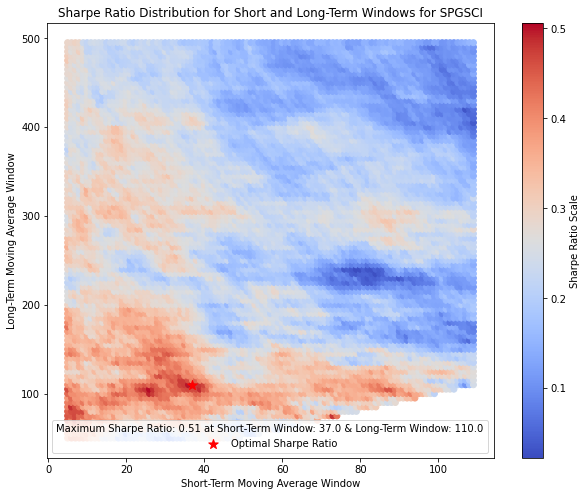

In [28]:
for instrument in prices.columns[6:9:2]:
    
    sharpe_data = []
    for fast in fast_windows:
        for slow in slow_windows:
            if fast < slow:
                strategy_returns = movingAverageCrossover(prices, instrument, fast, slow, position)
                sharpe_ratio = calculate_sharpe_ratio(strategy_returns)
                sharpe_data.append((fast, slow, sharpe_ratio))
                
    sharpe_df = pd.DataFrame(sharpe_data, columns=['ShortWindow', 'LongWindow', 'SharpeRatio'])
    
    max_sharpe = sharpe_df.loc[sharpe_df['SharpeRatio'].idxmax()]

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(sharpe_df['ShortWindow'], sharpe_df['LongWindow'], c=sharpe_df['SharpeRatio'], cmap='coolwarm')

    plt.scatter(max_sharpe['ShortWindow'], max_sharpe['LongWindow'], color='red', marker='*', s=100, label='Optimal Sharpe Ratio')

    color_bar = plt.colorbar(scatter)
    color_bar.set_label('Sharpe Ratio Scale')

    plt.xlabel('Short-Term Moving Average Window')
    plt.ylabel('Long-Term Moving Average Window')
    plt.title(f'Sharpe Ratio Distribution for Short and Long-Term Windows for {instrument}')

    plt.legend(title=f'Maximum Sharpe Ratio: {max_sharpe["SharpeRatio"]:.2f} at Short-Term Window: {max_sharpe["ShortWindow"]} & Long-Term Window: {max_sharpe["LongWindow"]}')


    plt.show()

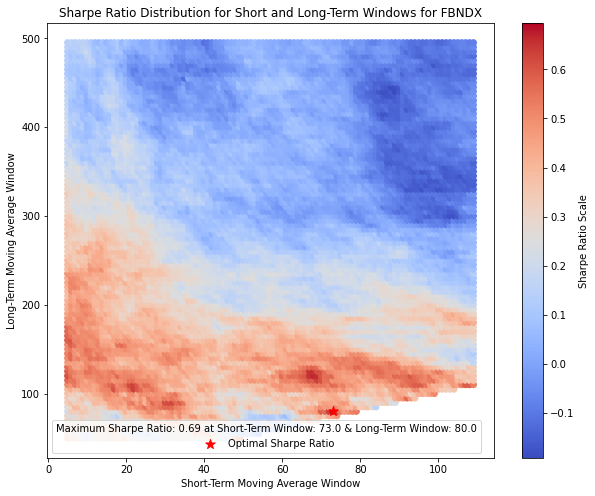

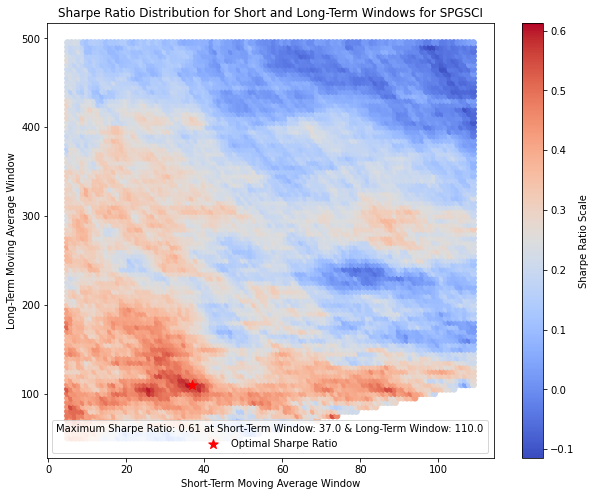

In [29]:
position = "short"
for instrument in prices.columns[6:9:2]:
    
    sharpe_data = []
    for fast in fast_windows:
        for slow in slow_windows:
            if fast < slow:
                strategy_returns = movingAverageCrossover(prices, instrument, fast, slow, position)
                sharpe_ratio = calculate_sharpe_ratio(strategy_returns)
                sharpe_data.append((fast, slow, sharpe_ratio))
                
    sharpe_df = pd.DataFrame(sharpe_data, columns=['ShortWindow', 'LongWindow', 'SharpeRatio'])
    
    max_sharpe = sharpe_df.loc[sharpe_df['SharpeRatio'].idxmax()]

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(sharpe_df['ShortWindow'], sharpe_df['LongWindow'], c=sharpe_df['SharpeRatio'], cmap='coolwarm')

    plt.scatter(max_sharpe['ShortWindow'], max_sharpe['LongWindow'], color='red', marker='*', s=100, label='Optimal Sharpe Ratio')

    color_bar = plt.colorbar(scatter)
    color_bar.set_label('Sharpe Ratio Scale')

    plt.xlabel('Short-Term Moving Average Window')
    plt.ylabel('Long-Term Moving Average Window')
    plt.title(f'Sharpe Ratio Distribution for Short and Long-Term Windows for {instrument}')

    plt.legend(title=f'Maximum Sharpe Ratio: {max_sharpe["SharpeRatio"]:.2f} at Short-Term Window: {max_sharpe["ShortWindow"]} & Long-Term Window: {max_sharpe["LongWindow"]}')


    plt.show()

In [30]:
prices.columns[4]

'PFE'

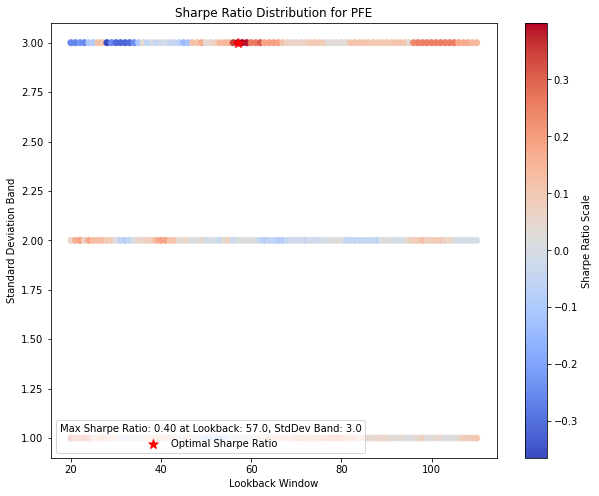

In [31]:

lookback_windows = range(20, 111)
stdev_bands = range(1, 4)


instrument = 'PFE'  
sharpe_data = []

for lookback in lookback_windows:
    for stdev in stdev_bands:
        strategy_returns = bollingerBands(prices, instrument, lookback, stdev)
        sharpe_ratio = calculate_sharpe_ratio(strategy_returns)
        sharpe_data.append((lookback, stdev, sharpe_ratio))

sharpe_df = pd.DataFrame(sharpe_data, columns=['LookbackWindow', 'StdDevBand', 'SharpeRatio'])

max_sharpe = sharpe_df.loc[sharpe_df['SharpeRatio'].idxmax()]

plt.figure(figsize=(10, 8))
scatter = plt.scatter(sharpe_df['LookbackWindow'], sharpe_df['StdDevBand'], c=sharpe_df['SharpeRatio'], cmap='coolwarm')

plt.scatter(max_sharpe['LookbackWindow'], max_sharpe['StdDevBand'], color='red', marker='*', s=100, label='Optimal Sharpe Ratio')

color_bar = plt.colorbar(scatter)
color_bar.set_label('Sharpe Ratio Scale')

plt.xlabel('Lookback Window')
plt.ylabel('Standard Deviation Band')
plt.title(f'Sharpe Ratio Distribution for {instrument}')

plt.legend(title=f'Max Sharpe Ratio: {max_sharpe["SharpeRatio"]:.2f} at Lookback: {max_sharpe["LookbackWindow"]}, StdDev Band: {max_sharpe["StdDevBand"]}')

plt.show()

In [32]:
prices.columns

Index(['AAPL', 'EXC', 'GE', 'INTC', 'PFE', 'SPY', 'FBNDX', 'VBTIX', 'SPGSCI',
       'XPT', 'CAD', 'GBP'],
      dtype='object')

In [33]:
aapl_ma_flat = movingAverageCrossover(prices, "AAPL", fastWindow=15, slowWindow=250, position="flat")
exc_ma_flat = movingAverageCrossover(prices, "EXC", fastWindow=15, slowWindow=250, position="flat")
ge_ma_short = movingAverageCrossover(prices, "GE", fastWindow=15, slowWindow=250, position="short")
pfe_bb = bollingerBands(prices, "PFE", lookbackWindow=57, stdevBand=3)
spy_ma_flat = movingAverageCrossover(prices, "SPY", fastWindow=15, slowWindow=250, position="flat")
fbndx_ma_flat = movingAverageCrossover(prices, "FBNDX", fastWindow=73, slowWindow=80, position="flat")
spgsci_ma_short = movingAverageCrossover(prices, "SPGSCI", fastWindow=73, slowWindow=80, position="short")
cad_bmk = bmk_returns["CAD"].copy()

In [34]:
portfolio = pd.concat([
    aapl_ma_flat.rename('AAPL-MAFlat'),
    exc_ma_flat.rename('EXC-MAFlat'),
    ge_ma_short.rename('GE-MAShort'),
    pfe_bb.rename('PFE-BB'),
    spy_ma_flat.rename('SPY-MAFlat'),
    fbndx_ma_flat.rename('FBNDX-MAFlat'),
    spgsci_ma_short.rename('SPGSCI-MAShort'),
    cad_bmk.rename('CAD-BMK')
], axis=1, join='inner')

In [35]:
portfolio_columns = ['AAPL-MAFlat', 'EXC-MAFlat', 'GE-MAShort', 'PFE-BB', 'SPY-MAFlat','FBNDX-MAFlat', 'SPGSCI-MAShort', 'CAD-BMK']

In [36]:
calculate_sharpe_ratio(portfolio)

AAPL-MAFlat       0.952563
EXC-MAFlat        0.079088
GE-MAShort        0.378458
PFE-BB            0.385550
SPY-MAFlat        0.440410
FBNDX-MAFlat      0.559306
SPGSCI-MAShort    0.295191
CAD-BMK           0.065168
dtype: float64

In [37]:
portfolio.dropna(inplace=True)

In [38]:
portfolio.corr()

,AAPL-MAFlat,EXC-MAFlat,GE-MAShort,PFE-BB,SPY-MAFlat,FBNDX-MAFlat,SPGSCI-MAShort,CAD-BMK
AAPL-MAFlat,1.000000,0.123058,-0.024741,0.045240,0.406584,-0.078574,0.024120,0.140542
EXC-MAFlat,0.123058,1.000000,-0.000258,0.044371,0.252469,-0.000170,-0.015594,0.118747
GE-MAShort,-0.024741,-0.000258,1.000000,-0.267140,0.149858,0.057533,0.081208,-0.107935
PFE-BB,0.045240,0.044371,-0.267140,1.000000,-0.011450,-0.074722,-0.082449,0.160152
SPY-MAFlat,0.406584,0.252469,0.149858,-0.011450,1.000000,-0.145381,0.036300,0.308988
FBNDX-MAFlat,-0.078574,-0.000170,0.057533,-0.074722,-0.145381,1.000000,0.019313,-0.058554
SPGSCI-MAShort,0.024120,-0.015594,0.081208,-0.082449,0.036300,0.019313,1.000000,-0.043224
CAD-BMK,0.140542,0.118747,-0.107935,0.160152,0.308988,-0.058554,-0.043224,1.000000


In [39]:
equal_weights = np.array(8*[0.125])

In [40]:
portfolio.cov()

,AAPL-MAFlat,EXC-MAFlat,GE-MAShort,PFE-BB,SPY-MAFlat,FBNDX-MAFlat,SPGSCI-MAShort,CAD-BMK
AAPL-MAFlat,0.000302,2.289626e-05,-8.257157e-06,0.000012,0.000049,-2.293714e-06,6.129579e-06,1.422933e-05
EXC-MAFlat,0.000023,1.144498e-04,-5.286443e-08,0.000007,0.000019,-3.044145e-09,-2.437668e-06,7.395381e-06
GE-MAShort,-0.000008,-5.286443e-08,3.682453e-04,-0.000077,0.000020,1.853097e-06,2.277085e-05,-1.205765e-05
PFE-BB,0.000012,7.100867e-06,-7.668597e-05,0.000224,-0.000001,-1.876159e-06,-1.802229e-05,1.394673e-05
SPY-MAFlat,0.000049,1.856381e-05,1.976518e-05,-0.000001,0.000047,-1.677157e-06,3.645613e-06,1.236302e-05
FBNDX-MAFlat,-0.000002,-3.044145e-09,1.853097e-06,-0.000002,-0.000002,2.817292e-06,4.736677e-07,-5.721411e-07
SPGSCI-MAShort,0.000006,-2.437668e-06,2.277085e-05,-0.000018,0.000004,4.736677e-07,2.135152e-04,-3.676776e-06
CAD-BMK,0.000014,7.395381e-06,-1.205765e-05,0.000014,0.000012,-5.721411e-07,-3.676776e-06,3.388945e-05


In [41]:
def portfolio_performance(weights, portfolio):
    portfolio_return = annualization_factor * np.dot(weights, portfolio.mean().T)
    portfolio_risk = np.sqrt(annualization_factor) * np.sqrt(np.dot(np.dot(weights, portfolio.cov()), weights.T))
    portfolio_sharpe = portfolio_return / portfolio_risk
    return portfolio_return, portfolio_risk, portfolio_sharpe

In [42]:
equal_wt_return, equal_wt_risk, equal_wt_sharpe = portfolio_performance(equal_weights, portfolio)

In [43]:
equal_wt_sharpe

1.020662479387499

In [44]:
np.random.seed(64) 

num_portfolios = 5000
num_assets = len(portfolio.columns)

In [45]:
weights_arr = np.zeros((num_portfolios, num_assets))
returns = np.zeros(num_portfolios)
volatility = np.zeros(num_portfolios)
sharpes = np.zeros(num_portfolios)

In [46]:
for i in range(num_portfolios):
    weights = np.array(np.random.random(num_assets))
    weights = weights / np.sum(weights)

    weights_arr[i, :] = weights
    
    portfolio_return, portfolio_volatility, portfolio_sharpe = portfolio_performance(weights, portfolio)

    returns[i] = portfolio_return
    volatility[i] = portfolio_volatility
    sharpes[i] = portfolio_sharpe
    

In [47]:
max_sharpe_idx = np.argmax(sharpes)
min_vol_idx = np.argmin(volatility)

max_sharpe_weights = weights_arr[max_sharpe_idx]
min_vol_weights = weights_arr[min_vol_idx]

In [48]:
weights_df = pd.DataFrame({'Security': portfolio_columns,
                           'Min Vol ': min_vol_weights,
                           'Max Sharpe ': max_sharpe_weights})

In [49]:
weights_df

,Security,Min Vol,Max Sharpe
0,AAPL-MAFlat,0.053786,0.249791
1,EXC-MAFlat,0.114810,0.046703
2,GE-MAShort,0.079046,0.108800
3,PFE-BB,0.031670,0.161396
4,SPY-MAFlat,0.036272,0.005282
5,FBNDX-MAFlat,0.455579,0.267049
6,SPGSCI-MAShort,0.055886,0.090448
7,CAD-BMK,0.172951,0.070531


In [50]:
min_vol_risk = volatility[min_vol_idx]
min_vol_return = returns[min_vol_idx]
min_vol_sharpe = sharpes[min_vol_idx]

In [51]:
max_sharpe_risk = volatility[max_sharpe_idx]
max_sharpe_return = returns[max_sharpe_idx]
max_sharpe_sharpe = sharpes[max_sharpe_idx]

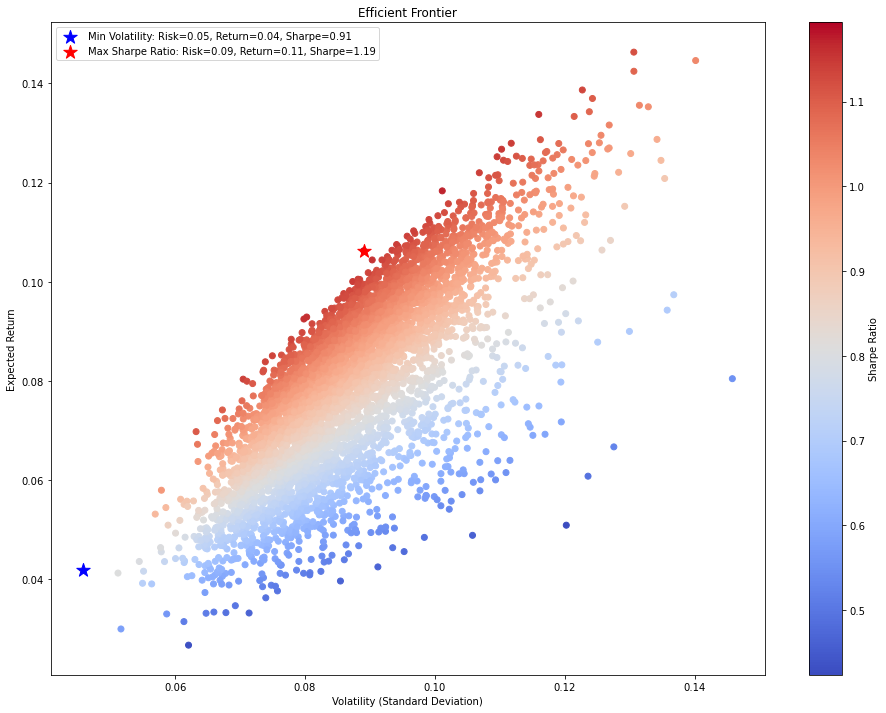

In [52]:
plt.figure(figsize=(16, 12))
scatter = plt.scatter(volatility, returns, c=sharpes, cmap='coolwarm')
plt.colorbar(scatter, label='Sharpe Ratio')

plt.scatter(min_vol_risk, min_vol_return, color='blue', marker='*', s=200, label=f'Min Volatility: Risk={min_vol_risk:.2f}, Return={min_vol_return:.2f}, Sharpe={min_vol_sharpe:.2f}')
plt.scatter(max_sharpe_risk, max_sharpe_return, color='red', marker='*', s=200, label=f'Max Sharpe Ratio: Risk={max_sharpe_risk:.2f}, Return={max_sharpe_return:.2f}, Sharpe={max_sharpe_sharpe:.2f}')

plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')

plt.legend()

plt.show()

In [53]:
max_sharpe_weights

array([0.24979129, 0.04670296, 0.10880033, 0.16139555, 0.00528234,
       0.26704878, 0.09044774, 0.07053101])

In [54]:
portfolio["Max Sharpe Portfolio"]=portfolio.dot(max_sharpe_weights)

In [55]:
portfolio

,AAPL-MAFlat,EXC-MAFlat,GE-MAShort,PFE-BB,SPY-MAFlat,FBNDX-MAFlat,SPGSCI-MAShort,CAD-BMK,Max Sharpe Portfolio
Date,,,,,,,,,
2000-12-27,0.0,0.004952,0.023078,-0.012509,0.0,-0.001394,-0.005392,-0.000199,-0.000151
2000-12-28,0.0,-0.021255,-0.005175,-0.010989,0.0,-0.001396,0.009315,0.007173,-0.002354
2000-12-29,0.0,0.012180,0.010376,-0.005450,-0.0,0.000000,-0.026329,0.000734,-0.001511
2001-01-02,0.0,-0.033749,0.091407,-0.002714,-0.0,0.006959,0.031359,0.003876,0.012899
2001-01-03,0.0,-0.075401,-0.088796,0.057158,0.0,-0.005563,-0.005314,-0.003009,-0.006136
...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.0,-0.045929,0.032697,0.033466,-0.0,0.000000,0.034847,0.000368,0.009991
2018-12-26,0.0,0.014721,-0.065712,0.039647,0.0,-0.000000,-0.034605,0.001693,-0.003074
2018-12-27,-0.0,0.006722,0.016371,0.015522,0.0,-0.000000,0.016042,-0.003310,0.005818


In [56]:
def calculate_summary_stats(portfolio_dataframe):

    average_annual_return = annualization_factor * portfolio_dataframe.mean()
    annual_risk = np.sqrt(annualization_factor) * portfolio_dataframe.std()
    sharpe_ratio = portfolio_dataframe.mean() / portfolio_dataframe.std() * np.sqrt(annualization_factor)
    cum_returns = portfolio_dataframe.cumsum().fillna(0)
    max_drawdown = (cum_returns - np.maximum.accumulate(cum_returns)).min(axis=0)
    success_ratio = (portfolio_dataframe.dropna() >= 0).sum() / portfolio_dataframe.dropna().shape[0]

    summary_stats = pd.DataFrame([average_annual_return, annual_risk, sharpe_ratio, max_drawdown, success_ratio],
                                 index=['Average Annual Return', 'Annual Risk', 'Sharpe Ratio', 'maxDD', 'Success Ratio'])
    return summary_stats.T


In [57]:
calculate_summary_stats(portfolio)

,Average Annual Return,Annual Risk,Sharpe Ratio,maxDD,Success Ratio
AAPL-MAFlat,0.267132,0.280435,0.952563,-0.588979,0.655629
EXC-MAFlat,0.013643,0.172502,0.079088,-0.637419,0.713245
GE-MAShort,0.117104,0.309425,0.378458,-1.613992,0.517219
PFE-BB,0.093414,0.241210,0.387272,-0.892687,0.512362
SPY-MAFlat,0.048808,0.110825,0.440410,-0.233561,0.686313
FBNDX-MAFlat,0.015220,0.027065,0.562365,-0.115008,0.813687
SPGSCI-MAShort,0.070195,0.235614,0.297922,-0.719851,0.511258
CAD-BMK,0.005876,0.093868,0.062594,-0.459944,0.507947
Max Sharpe Portfolio,0.106268,0.089047,1.193388,-0.147429,0.540397


In [58]:
beta_df = pd.concat([portfolio["Max Sharpe Portfolio"], bmk_returns["SPY"]], axis=1, join="inner")

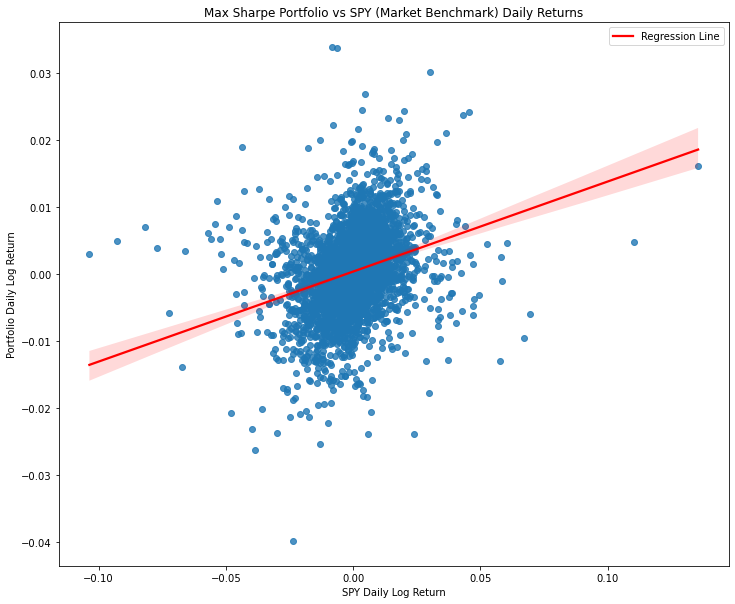

In [59]:
plt.figure(figsize=(12, 10))
sns.regplot(x='SPY', y='Max Sharpe Portfolio', data=beta_df, scatter_kws={'marker': 'o'}, line_kws={'color': 'red', 'label': 'Regression Line'})

plt.title('Max Sharpe Portfolio vs SPY (Market Benchmark) Daily Returns')
plt.xlabel('SPY Daily Log Return')
plt.ylabel('Portfolio Daily Log Return')

# Adding legend
plt.legend()

plt.show()

In [60]:
X = beta_df["SPY"]
X = sm.add_constant(X)
y = beta_df["Max Sharpe Portfolio"]

In [61]:
portfolio_regression = sm.OLS(y, X)
portfolio_regression = portfolio_regression.fit()
portfolio_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Max Sharpe Portfolio   R-squared:                       0.084
Model:                              OLS   Adj. R-squared:                  0.084
Method:                   Least Squares   F-statistic:                     417.5
Date:                  Sat, 02 Dec 2023   Prob (F-statistic):           7.65e-89
Time:                          17:45:45   Log-Likelihood:                 17324.
No. Observations:                  4530   AIC:                        -3.464e+04
Df Residuals:                      4528   BIC:                        -3.463e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004   7.85e-05      4.965      0.000       0.000       0.001
SPY            0.1342      0.007     20.434      0.000       0.121       0.147
==============================================================================
Omnibus:                      381.157   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2373.945
Skew:                           0.063   Prob(JB):                         0.00
Kurtosis:                       6.544   Cond. No.                         83.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
beta = portfolio_regression.params.SPY

In [63]:
print(f"The beta for the maximum sharpe portfolio is: {beta:0.3f}")

The beta for the maximum sharpe portfolio is: 0.134


In [64]:
portfolio_start_date = portfolio.index[0]

In [65]:
portfolio_start_date

Timestamp('2000-12-27 00:00:00')

In [66]:
portfolio_columns = [item.split("-")[0] for item in portfolio.columns[:-1].to_list()]

In [67]:
portfolio_columns

['AAPL', 'EXC', 'GE', 'PFE', 'SPY', 'FBNDX', 'SPGSCI', 'CAD']

In [68]:
all_bmk_portfolio = bmk_returns[bmk_returns.index >= portfolio_start_date]

In [69]:
all_bmk_portfolio = all_bmk_portfolio[portfolio_columns]
all_bmk_portfolio

,AAPL,EXC,GE,PFE,SPY,FBNDX,SPGSCI,CAD
Date,,,,,,,,
2000-12-27,0.008474,0.004952,-0.023078,0.012509,0.007293,-0.001394,0.005392,-0.000199
2000-12-28,0.000000,-0.021255,0.005175,0.010989,0.003043,-0.001396,-0.009315,0.007173
2000-12-29,0.004210,0.012180,-0.010376,0.005450,-0.019111,0.000000,0.026329,0.000734
2001-01-02,0.000000,-0.033749,-0.091407,0.002714,-0.018270,0.006959,-0.031359,0.003876
2001-01-03,0.096075,-0.075401,0.088796,-0.057158,0.046917,-0.005563,0.005314,-0.003009
...,...,...,...,...,...,...,...,...
2018-12-24,-0.026215,-0.045929,-0.032697,-0.033466,-0.026778,0.001303,-0.034847,0.000368
2018-12-26,0.068053,0.014721,0.065712,0.039647,0.049290,-0.003914,0.034605,0.001693
2018-12-27,-0.006511,0.006722,-0.016371,0.015522,0.007648,-0.002618,-0.016042,-0.003310


In [70]:
all_bmk_sharpe = portfolio_performance(equal_weights, all_bmk_portfolio)[-1]

In [71]:
all_bmk_sharpe

0.23709427630637916

In [72]:
all_ma_flat_portfolio = pd.DataFrame()
for instrument in portfolio_columns:
    if instrument in portfolio_columns[:-3]:
        all_ma_flat_portfolio[instrument] = movingAverageCrossover(prices, instrument, fastWindow=15, slowWindow=250, position="flat")
    else:
        all_ma_flat_portfolio[instrument] = movingAverageCrossover(prices, instrument, fastWindow=73, slowWindow=80, position="flat")

In [73]:
all_ma_flat_portfolio.dropna(inplace=True)

In [74]:
all_ma_flat_sharpe = portfolio_performance(equal_weights, all_ma_flat_portfolio)[-1]

In [75]:
all_ma_flat_sharpe

0.6804600453874653

In [76]:
all_ma_short_portfolio = pd.DataFrame()
for instrument in portfolio_columns:
    if instrument in portfolio_columns[:-3]:
        all_ma_short_portfolio[instrument] = movingAverageCrossover(prices, instrument, fastWindow=15, slowWindow=250, position="short")
    else:
        all_ma_short_portfolio[instrument] = movingAverageCrossover(prices, instrument, fastWindow=73, slowWindow=80, position="short")

In [77]:
all_ma_short_portfolio.dropna(inplace=True)

In [78]:
all_ma_short_sharpe = portfolio_performance(equal_weights, all_ma_short_portfolio)[-1]

In [79]:
all_ma_short_sharpe

0.5764134690632674

In [80]:
all_bb_portfolio = pd.DataFrame()
for instrument in portfolio_columns:
    all_bb_portfolio[instrument] = bollingerBands(prices, instrument, lookbackWindow=57, stdevBand=3)

In [81]:
all_bb_portfolio = all_bb_portfolio[all_bb_portfolio.index >= portfolio_start_date]

In [82]:
all_bb_sharpe = portfolio_performance(equal_weights, all_bb_portfolio)[-1]

In [83]:
all_bb_sharpe

-0.11448532853473617

In [84]:
max_sharpe_sharpe

1.19338771622371

In [85]:
sharpe_dict = {
    "Maximum Sharpe Portfolio":  max_sharpe_sharpe,
    "All Benchmark Portfolio": all_bmk_sharpe,
    "All MA Flat Portfolio": all_ma_flat_sharpe,
    "All MA Short Portfolio": all_ma_short_sharpe,
    "All Bollinger Bands Portfolio": all_bb_sharpe
}

In [86]:
all_variations = pd.DataFrame(list(sharpe_dict.items()), columns=['Portfolio', 'Sharpe Ratio'])

In [87]:
all_variations.set_index("Portfolio", drop=True, inplace=True)

In [88]:
all_variations

,Sharpe Ratio
Portfolio,
Maximum Sharpe Portfolio,1.193388
All Benchmark Portfolio,0.237094
All MA Flat Portfolio,0.680460
All MA Short Portfolio,0.576413
All Bollinger Bands Portfolio,-0.114485
